In [1]:
!pip install duckduckgo-search
!pip install fastai


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import certifi
import urllib.request
import ssl
from duckduckgo_search import DDGS
from fastai.vision.all import *

DATA_DIR = Path("data")
MODEL_PATH = Path("exercise_classifier.pkl")

def download_image_with_headers(url: str, dest: Path):
    headers = {
        "User-Agent": "Mozilla/5.0"
    }
    req = urllib.request.Request(url, headers=headers)
    ctx = ssl.create_default_context(cafile=certifi.where())

    with urllib.request.urlopen(req, context=ctx) as response:
        dest.write_bytes(response.read())

def search_images_ddg(keywords, max_images = 30):
    return L(DDGS().images(keywords, max_results=max_images)).itemgot("image")

def download(label: str, n: int = 30):
    dest = DATA_DIR/label
    dest.mkdir(parents=True, exist_ok=True)
    urls = search_images_ddg(f"{label} photo", max_images = n)
    for i, url in enumerate(urls):
        try:
            img_path = dest/f"{label}_{i}.jpg"
            download_image_with_headers(url, img_path)
        except Exception as e:
            print(f"Failed: {url} - {e}")
    print(f"Downloaded {len(dest.ls())} images to {dest}")

In [12]:
download("pushup exercise")

Failed: https://www.johnsonfitness.com/blog/wp-content/uploads/2015/11/iStock_000042278894_Full-2.jpg - HTTP Error 403: Forbidden
Failed: https://www.publicdomainpictures.net/pictures/380000/velka/push-up-excercise-1610372643pLR.jpg - HTTP Error 403: Forbidden
Failed: https://www.sahilfitness.com/wp-content/uploads/2021/08/Push-Up-On-Knees_Exercise-1024x1001.jpg - <urlopen error [Errno 8] nodename nor servname provided, or not known>
Failed: https://blog.nasm.org/hubfs/Guide+to+Push+ups+Main+Image.jpg - HTTP Error 404: Not Found
Downloaded 26 images to data/pushup exercise


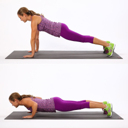

In [13]:
dest = "data/pushup/pushup exercise_0.jpg"
im = Image.open(dest)
im.to_thumb(128,128)

In [14]:
download("pullup")

Failed: http://blogs.rdxsports.com/wp-content/uploads/2017/11/pull-up-bar-exercises.jpg - HTTP Error 403: Forbidden
Downloaded 29 images to data/pullup


RatelimitException: https://duckduckgo.com/i.js?o=json&q=squat+photo&l=wt-wt&vqd=4-155037169891442778378749077933544505630&p=1&f=%2C%2C%2C%2C%2C 403 Ratelimit

In [15]:
download("squat")

Failed: https://www.publicdomainpictures.net/pictures/320000/velka/squats-157857424579J.jpg - HTTP Error 403: Forbidden
Failed: http://new-sport-workout.com/wp-content/uploads/2018/07/1-4-1024x819.jpg - HTTP Error 404: Not Found
Failed: https://www.stylist.co.uk/images/app/uploads/2020/03/02111207/how-to-squat.jpg?w=1200&h=1&fit=max&auto=format,compress - HTTP Error 403: Forbidden
Downloaded 27 images to data/squat


In [5]:
path = DATA_DIR
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f"Failed {len(failed)} images")

Failed 0 images


In [6]:
doc(verify_images)

verify_images(fns)
Find images in `fns` that can't be opened

To get a prettier result with hyperlinks to source code and documentation, install nbdev: pip install nbdev


In [ ]:
%debug

> /tmp/ipykernel_99140/1189013952.py(1)<module>()
----> 1 path = DATA_DIR
      2 failed = verify_images(get_image_files(path))
      3 failed.map(Path.unlink)
      4 print(f"Failed {len(failed)} images")

